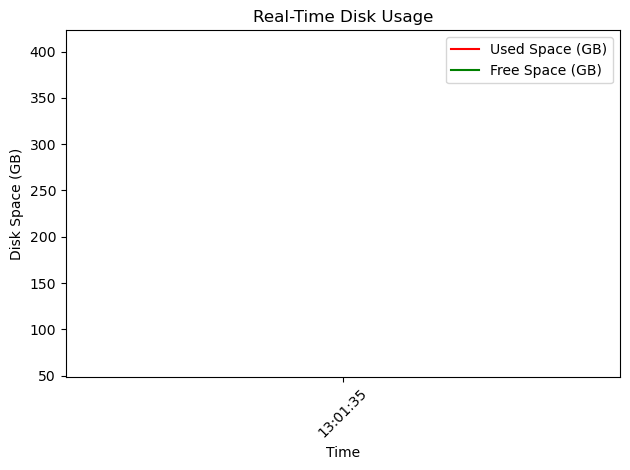

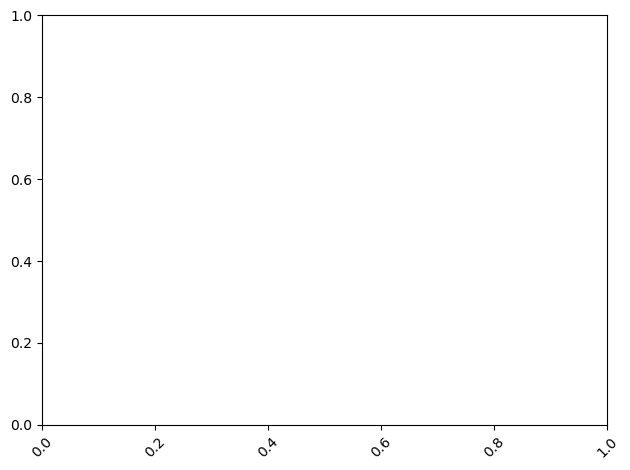

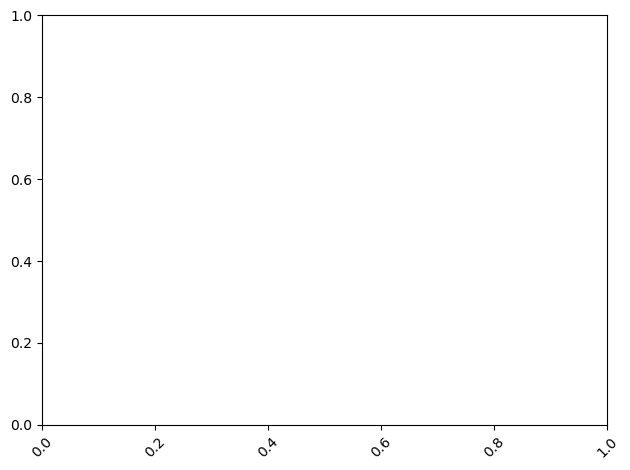

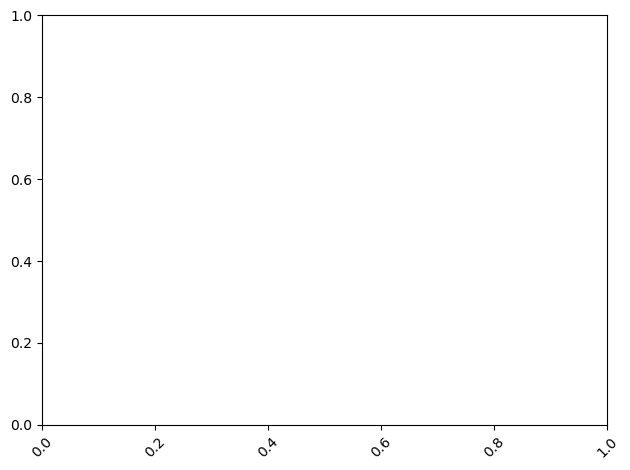

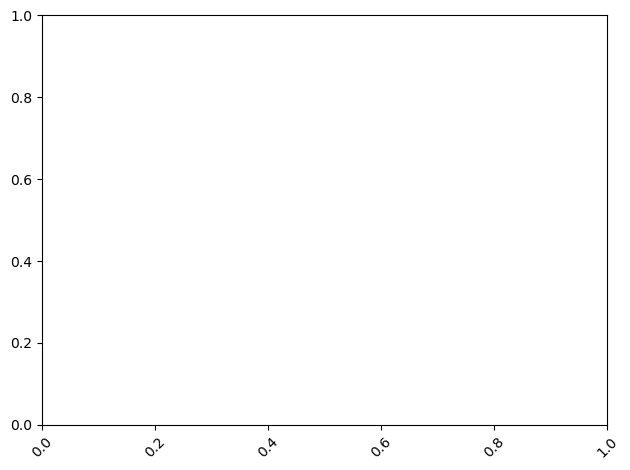

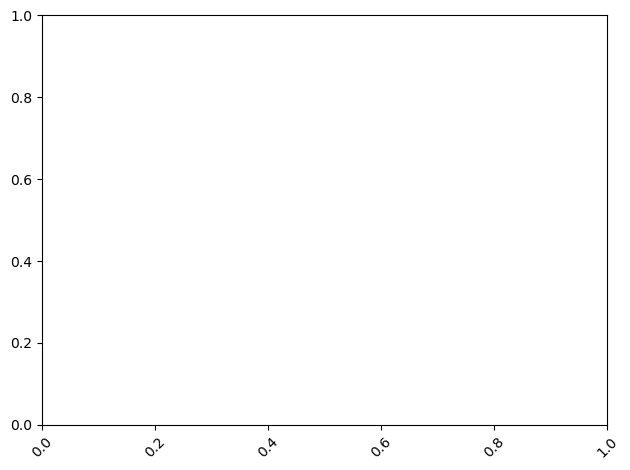

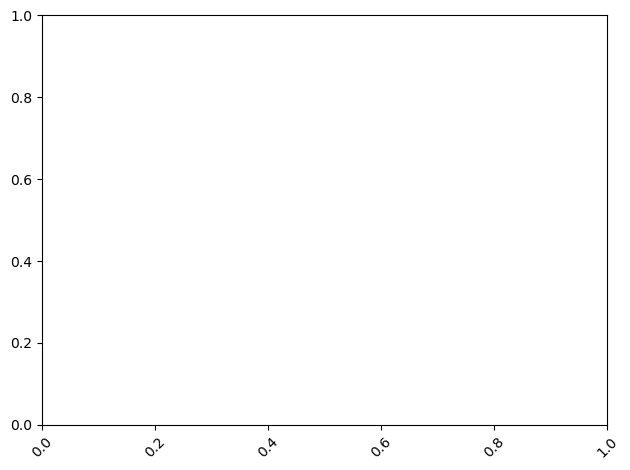

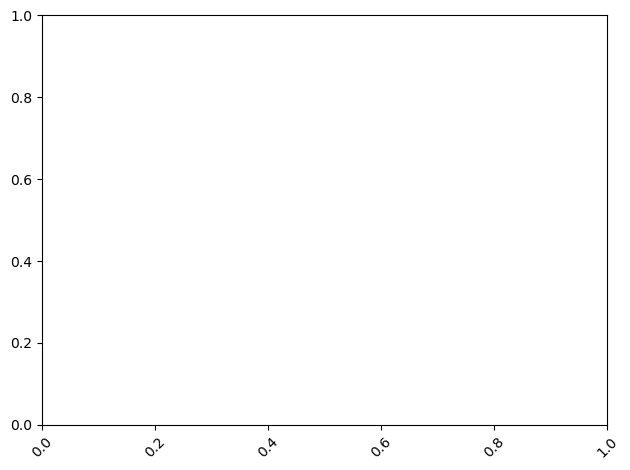

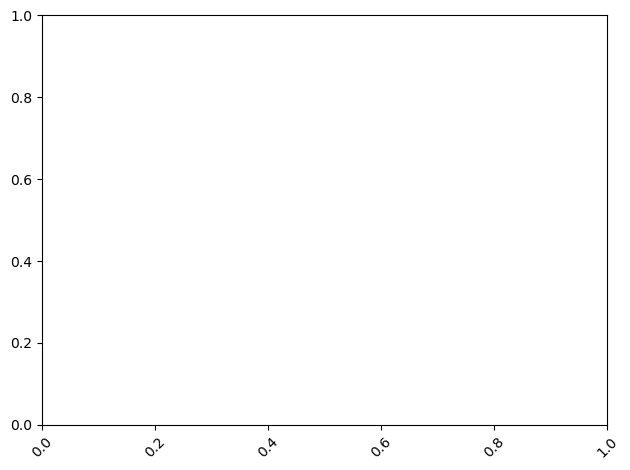

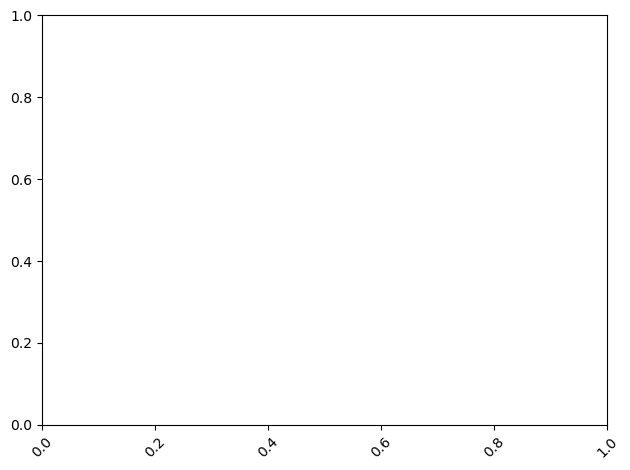

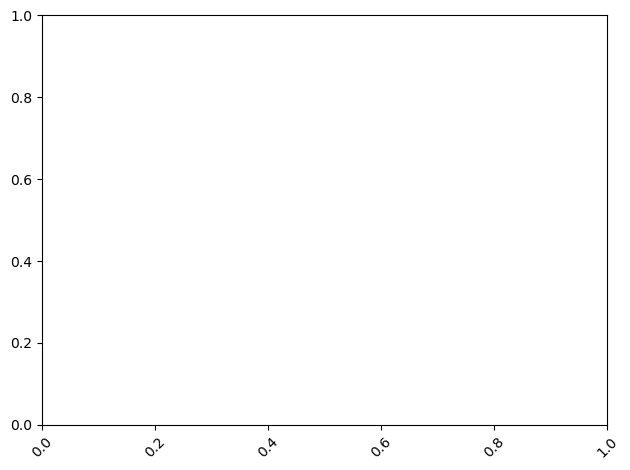

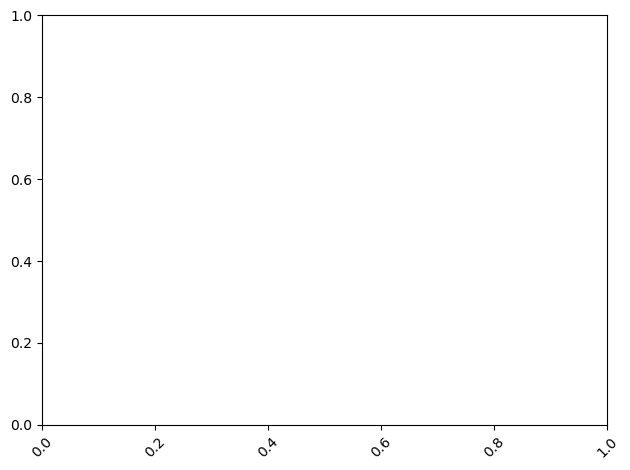

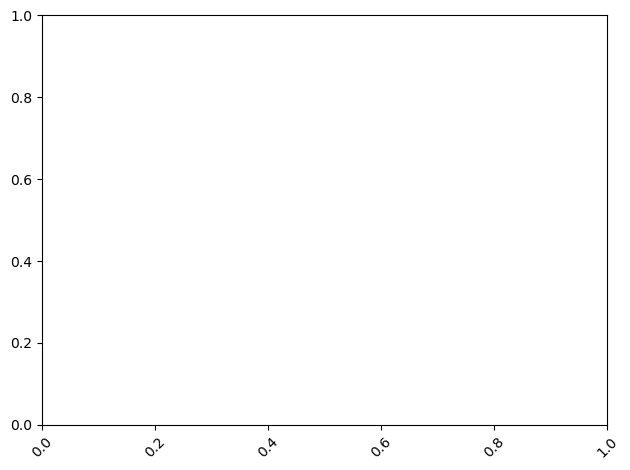

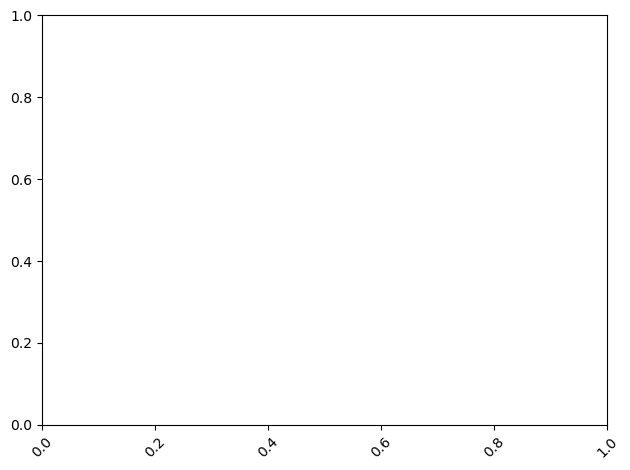

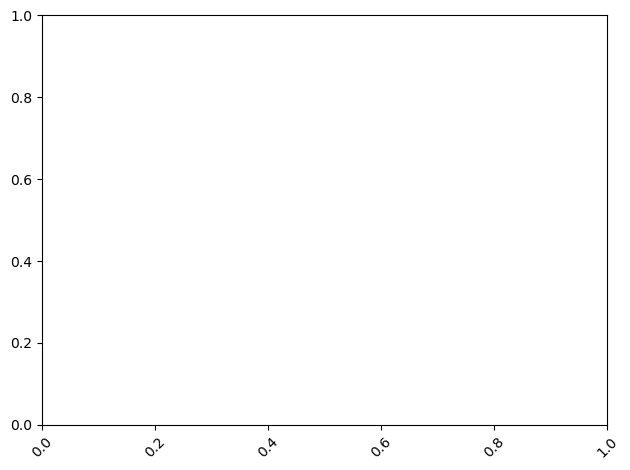

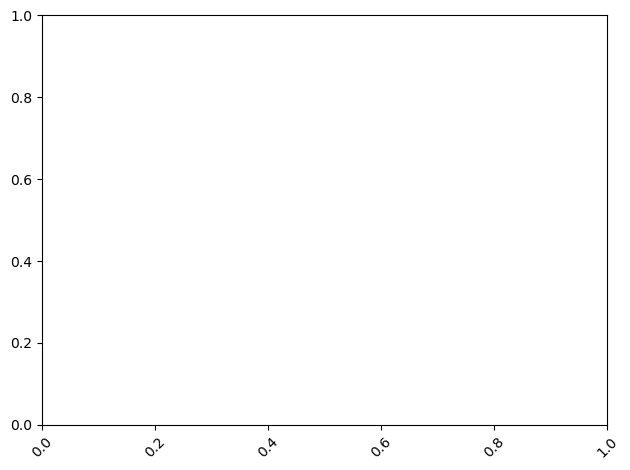

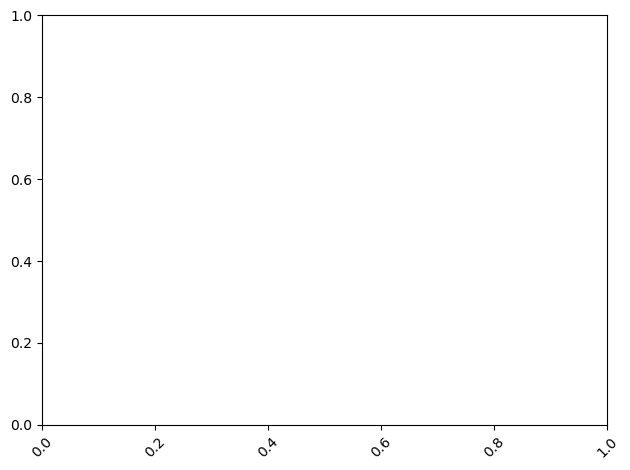

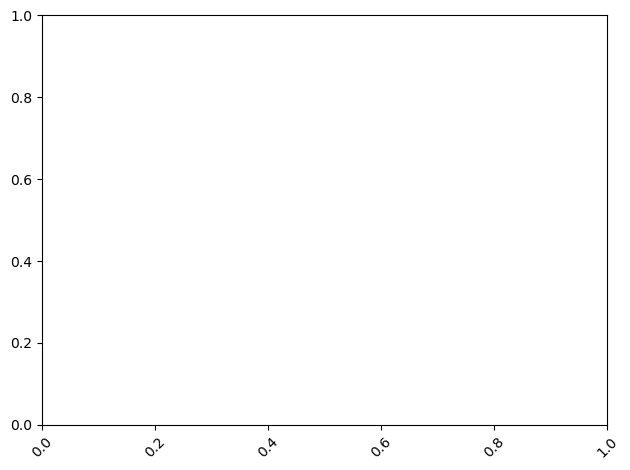

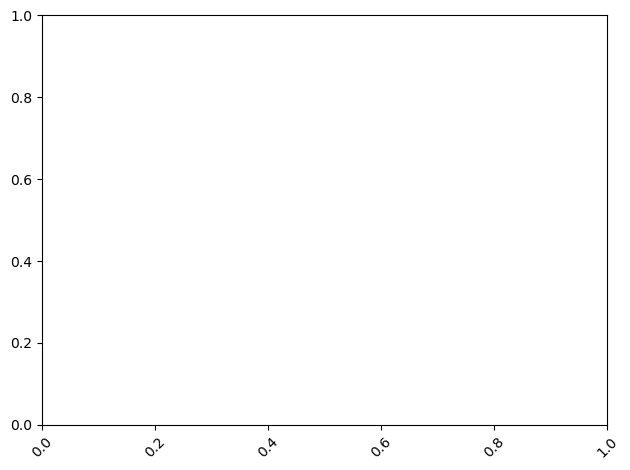

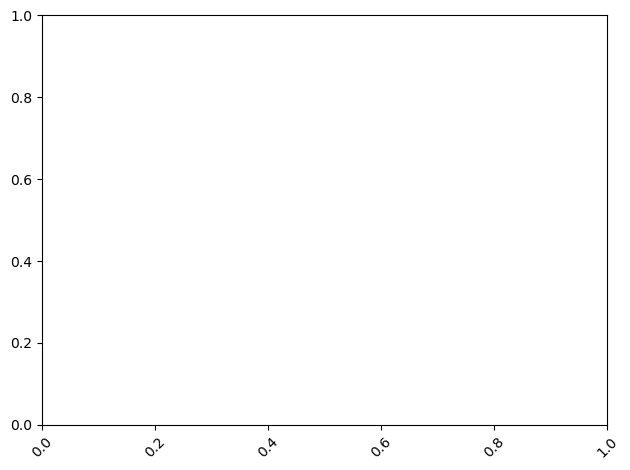

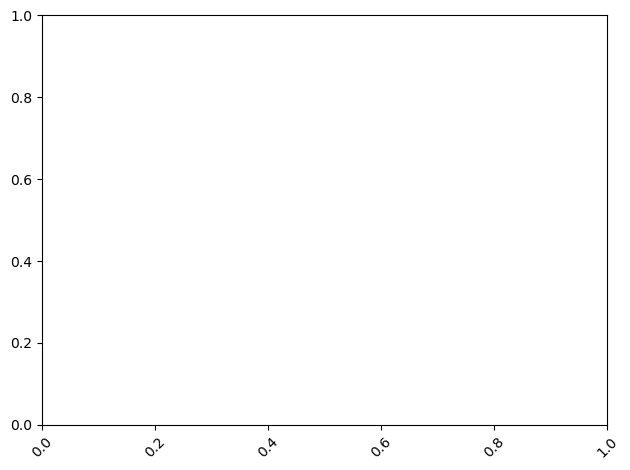

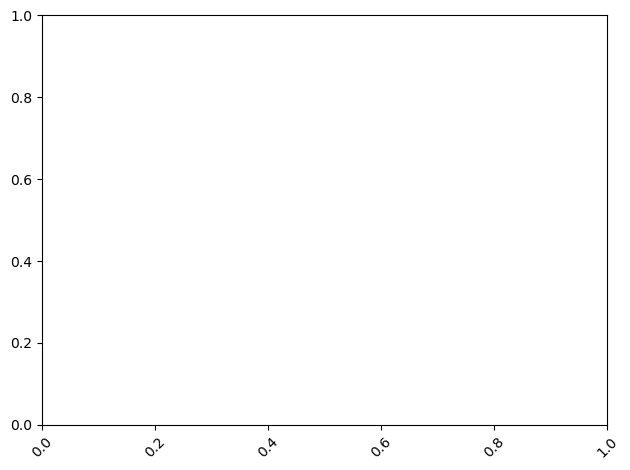

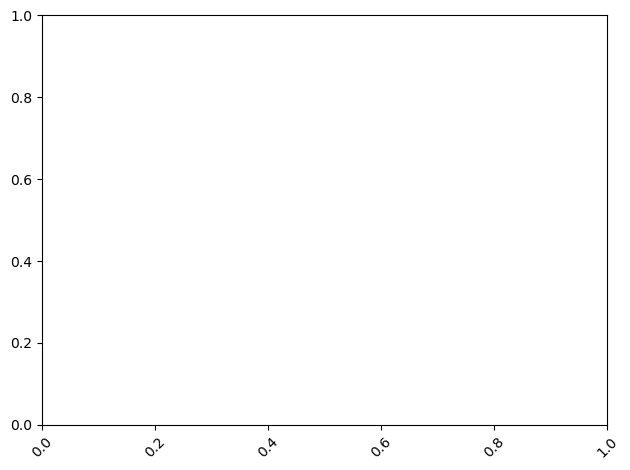

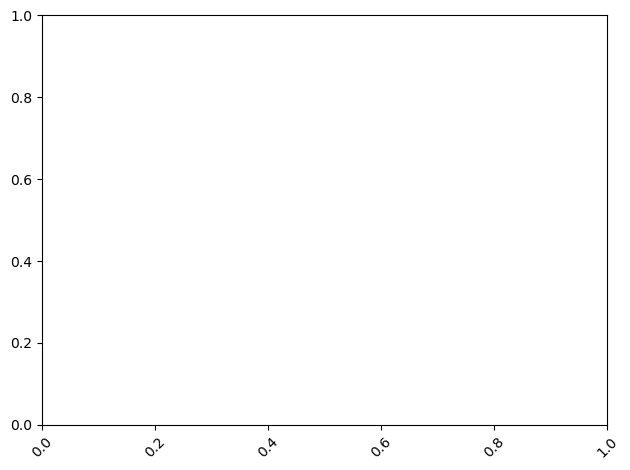

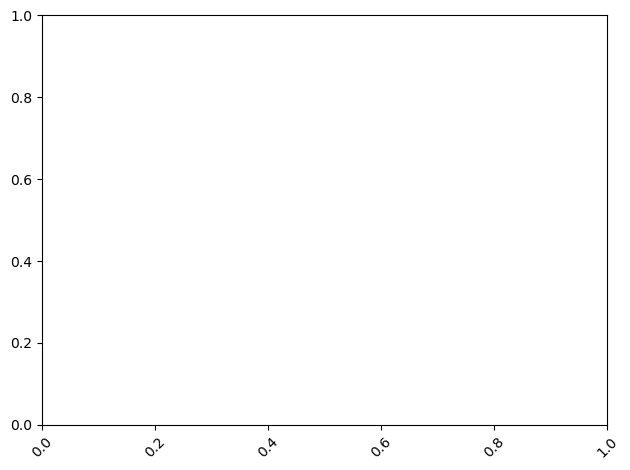

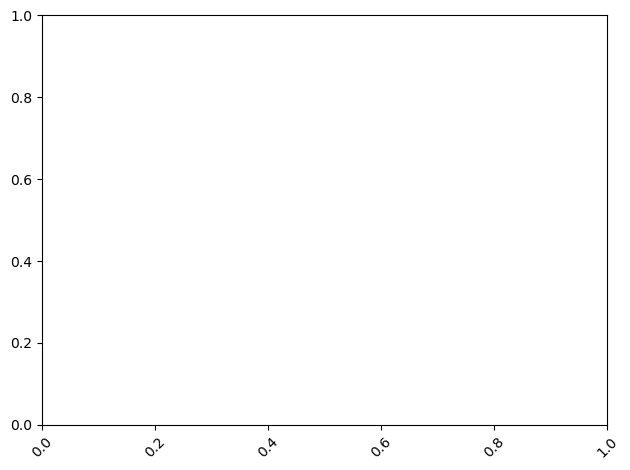

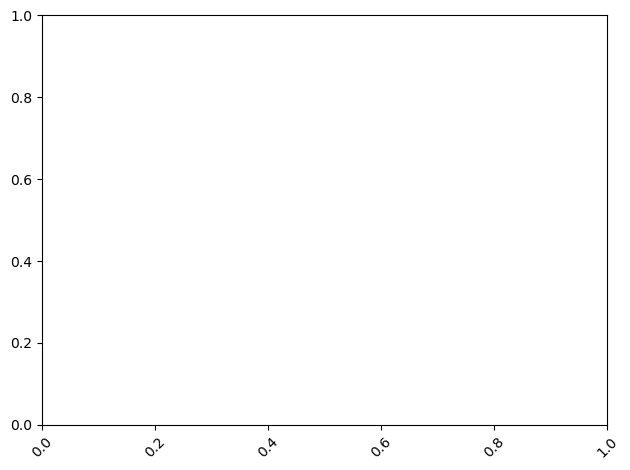

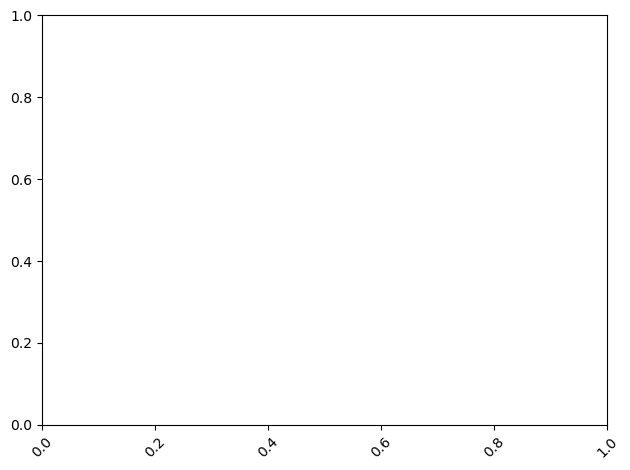

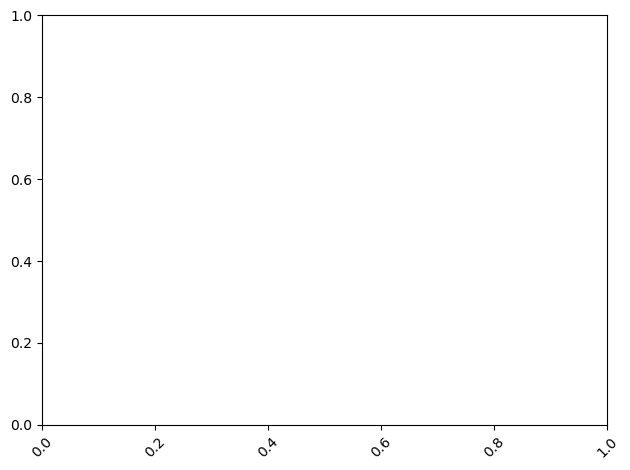

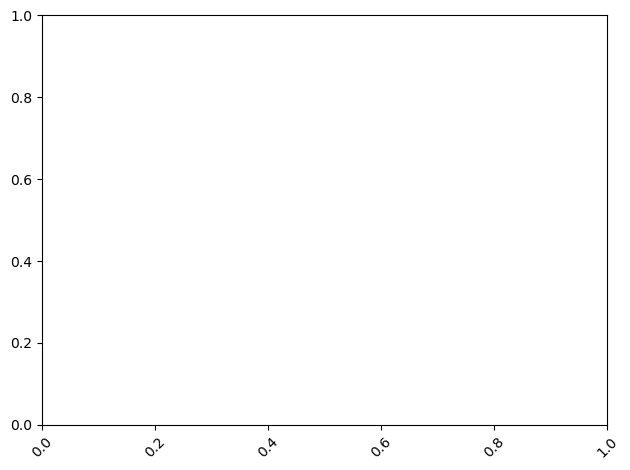

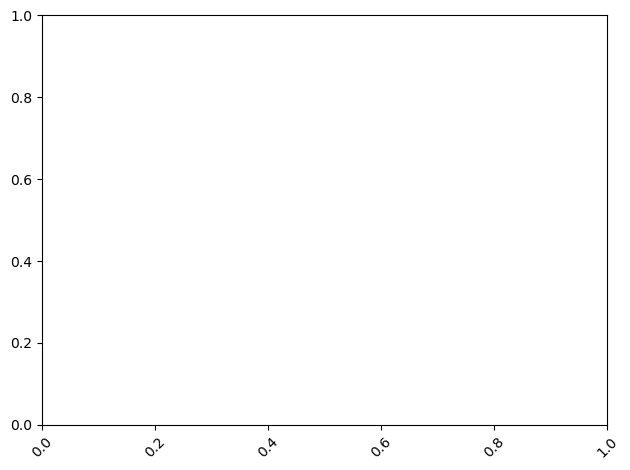

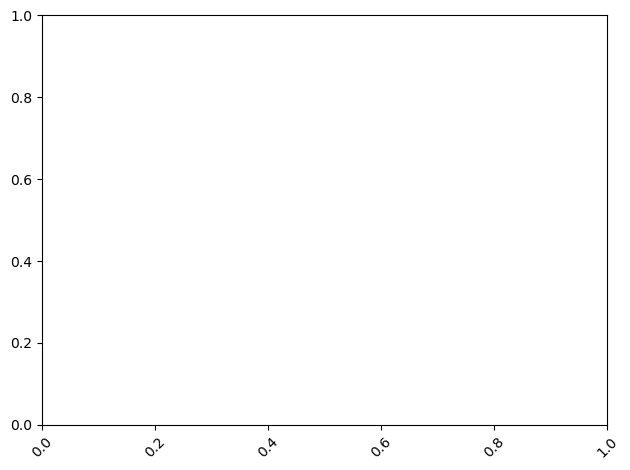

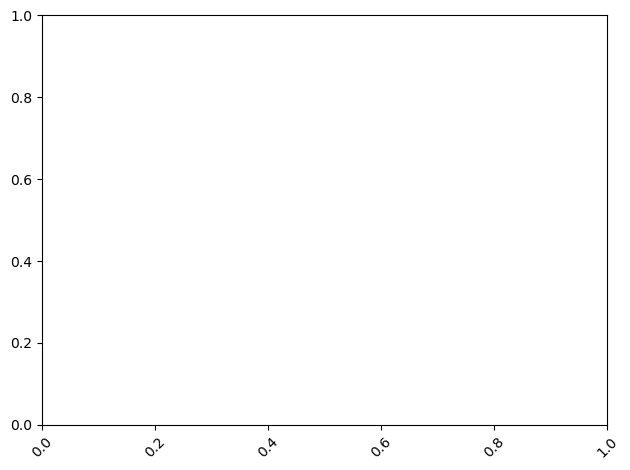

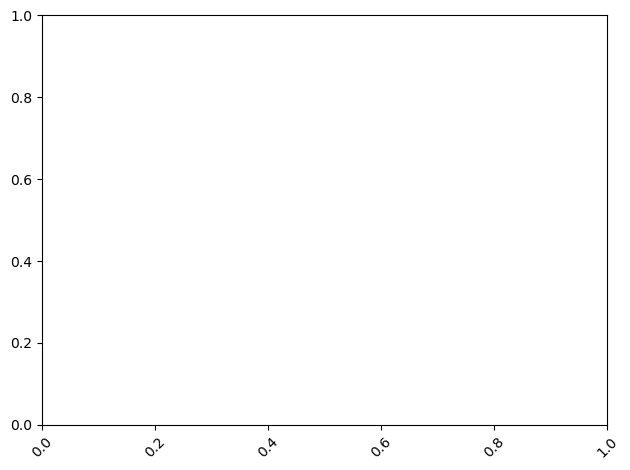

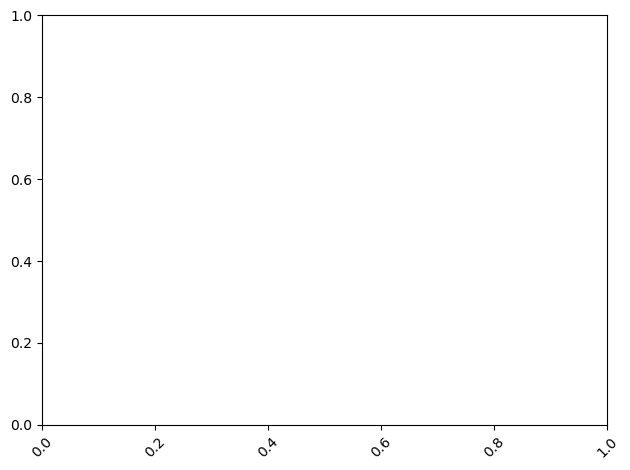

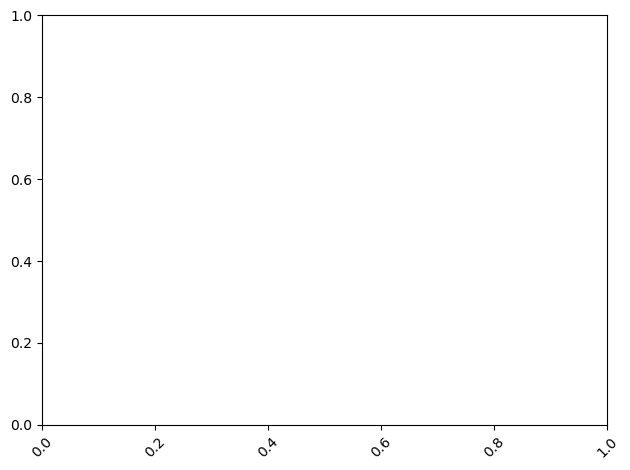

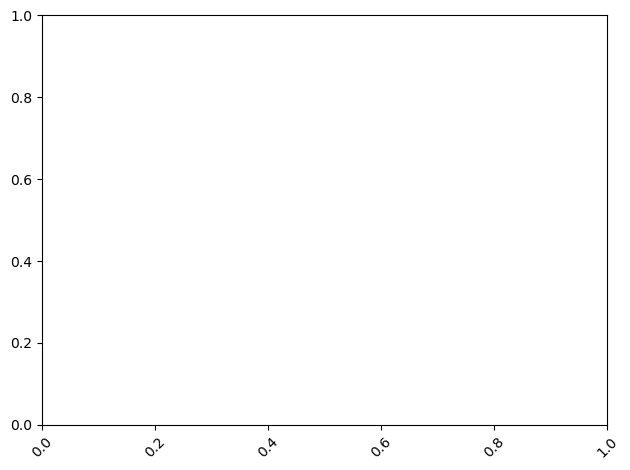

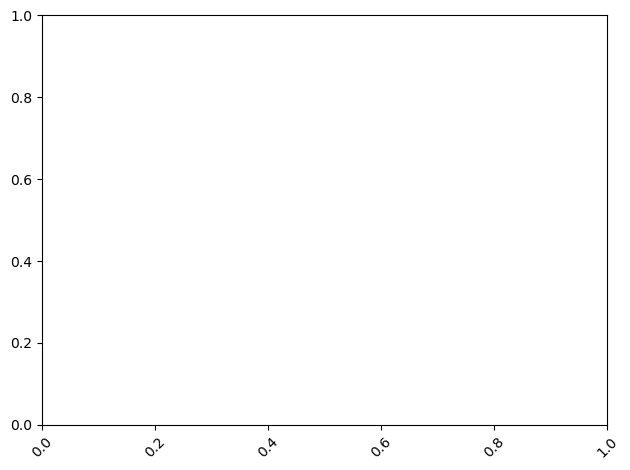

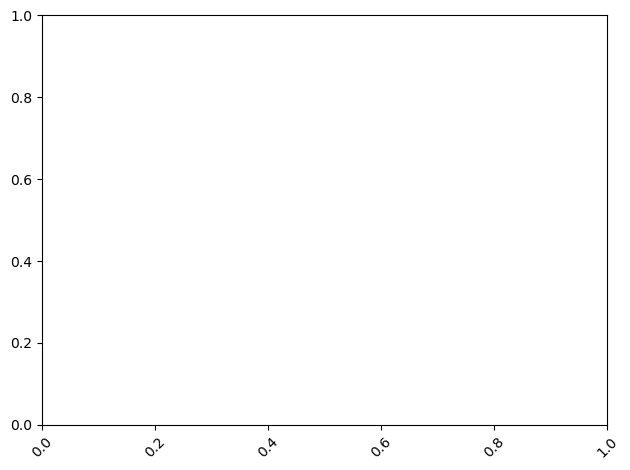

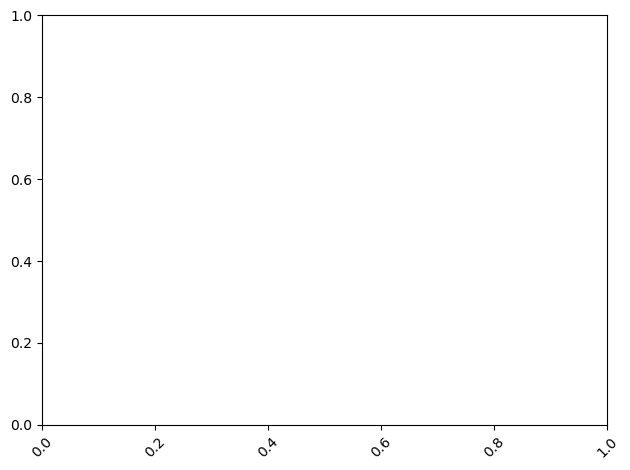

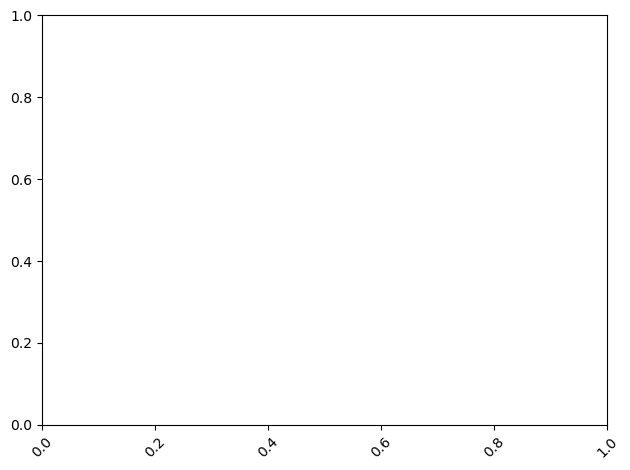

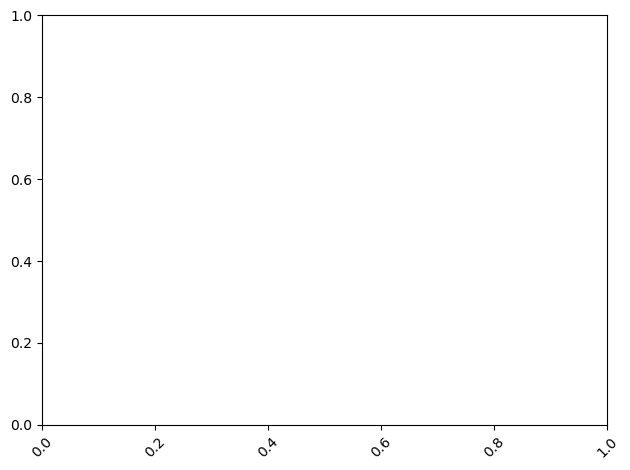

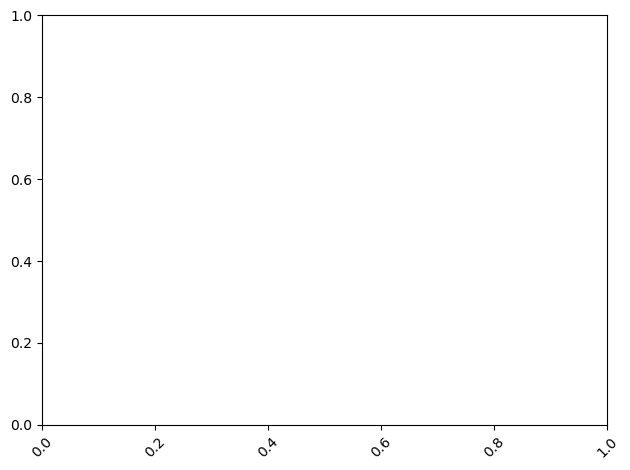

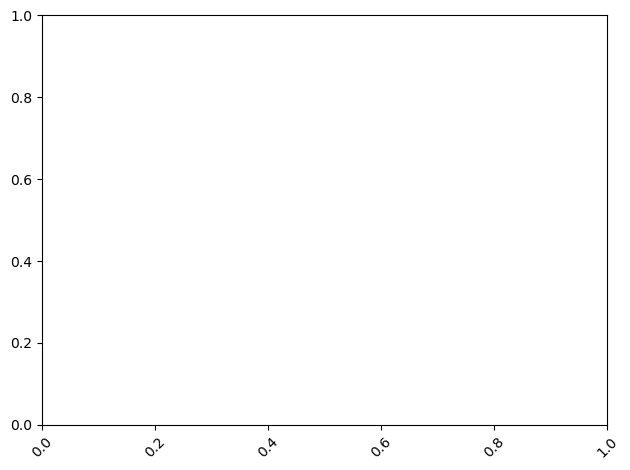

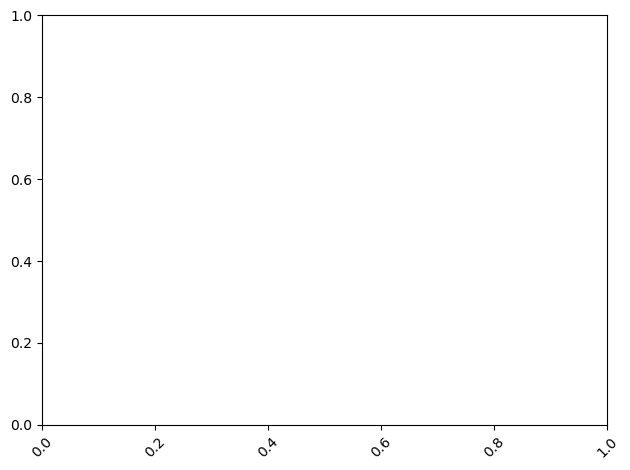

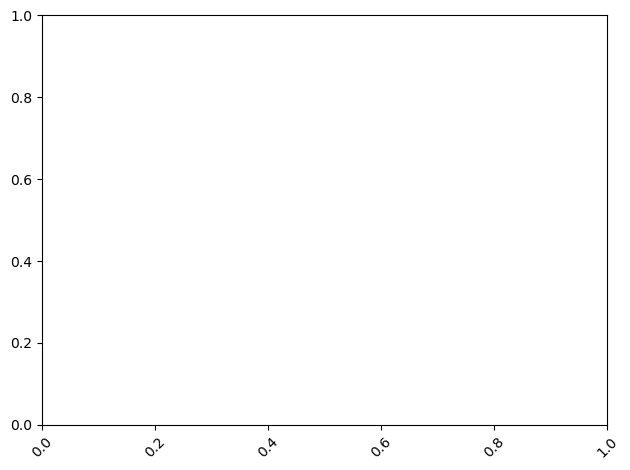

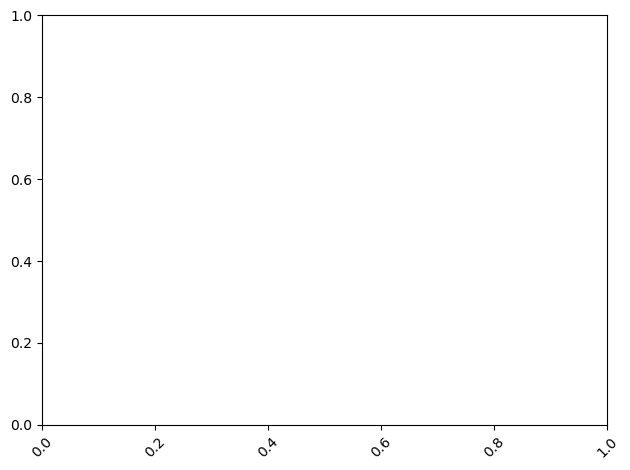

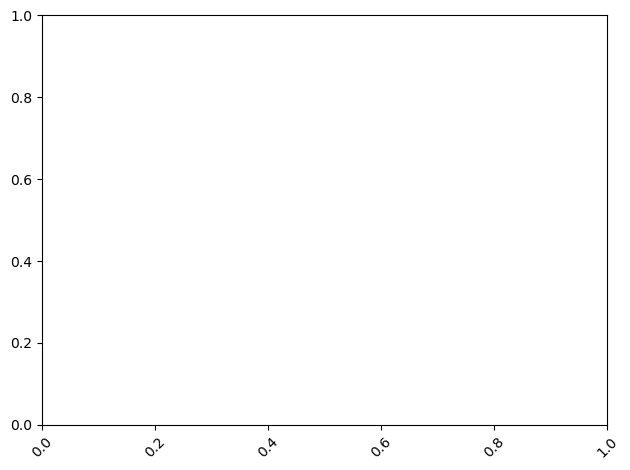

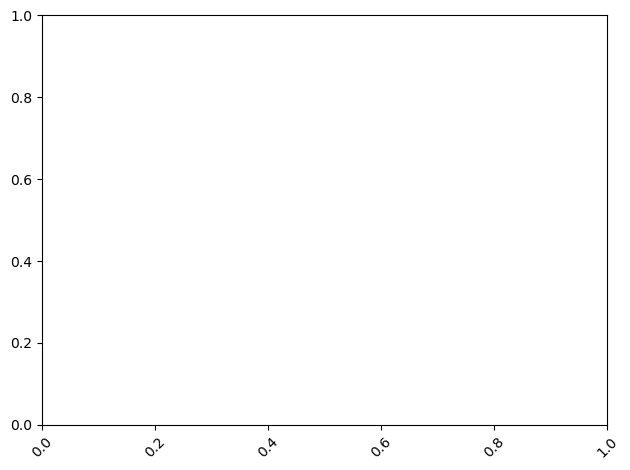

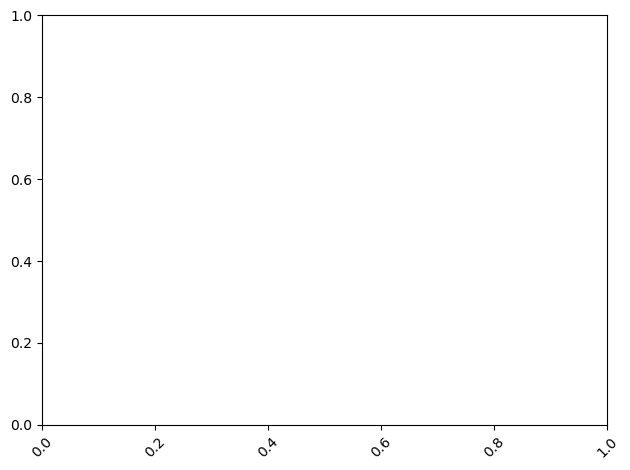

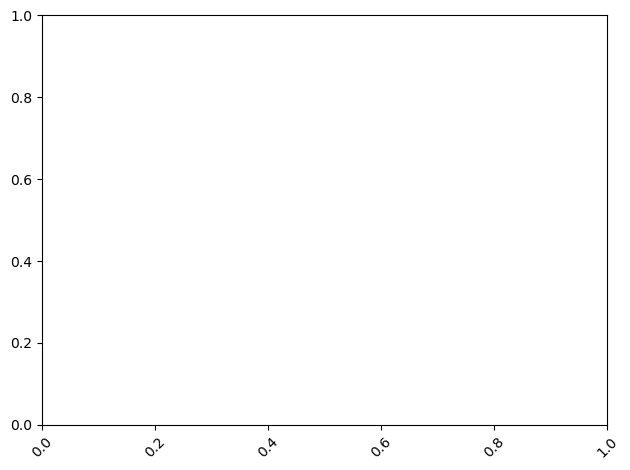

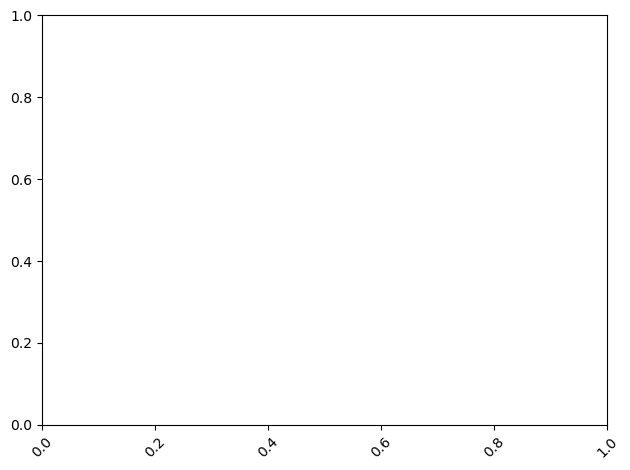

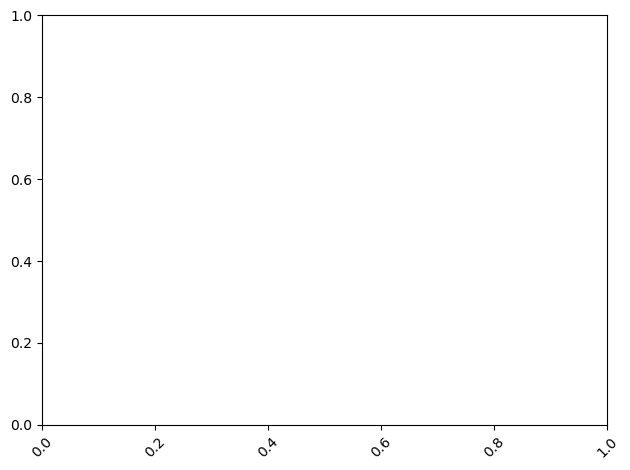

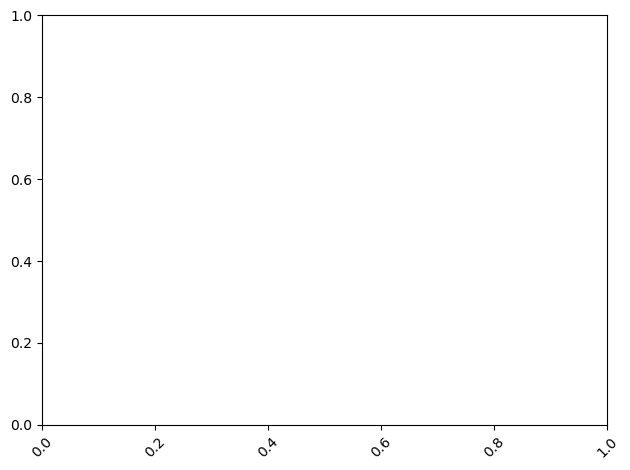

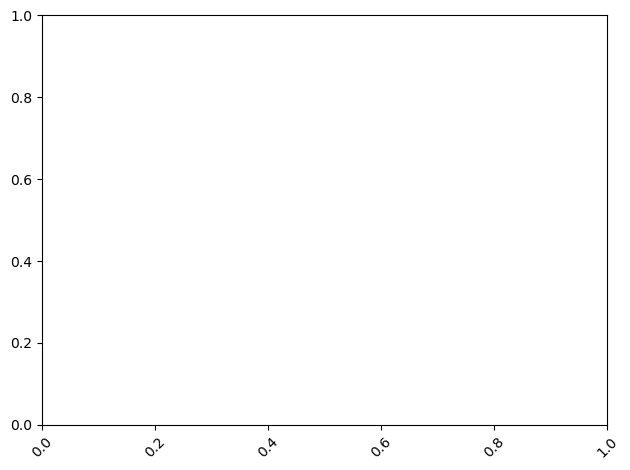

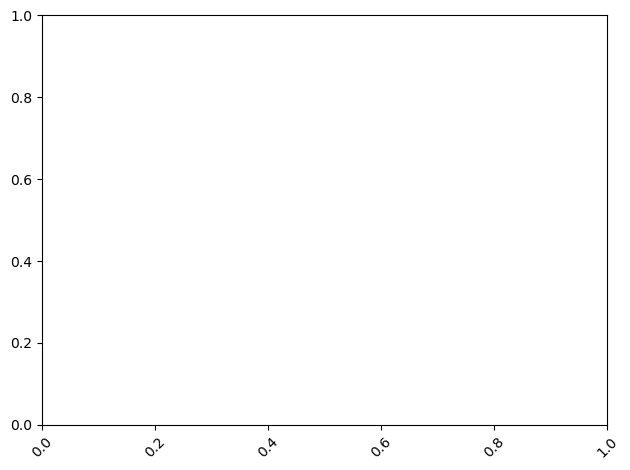

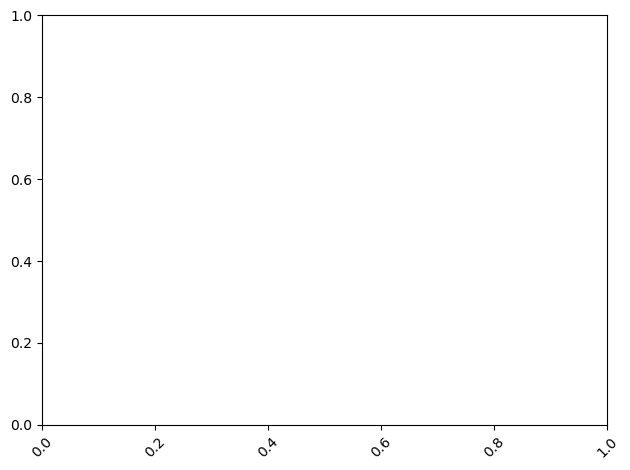

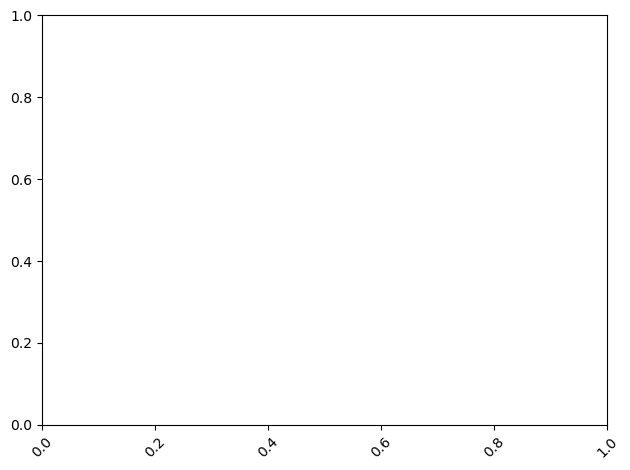

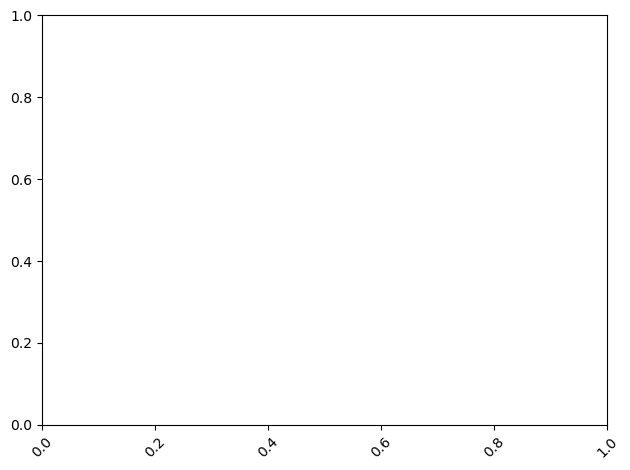

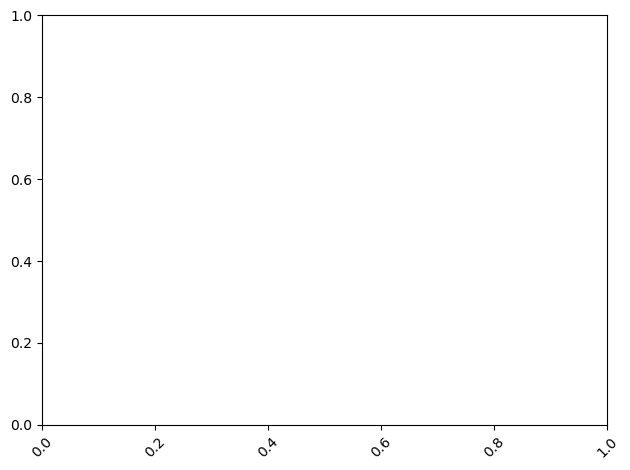

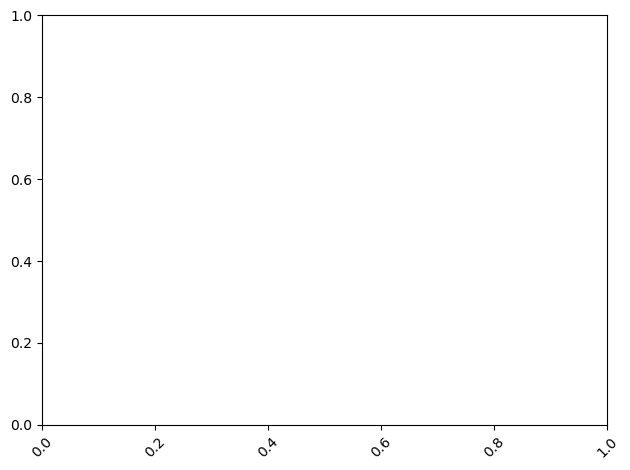

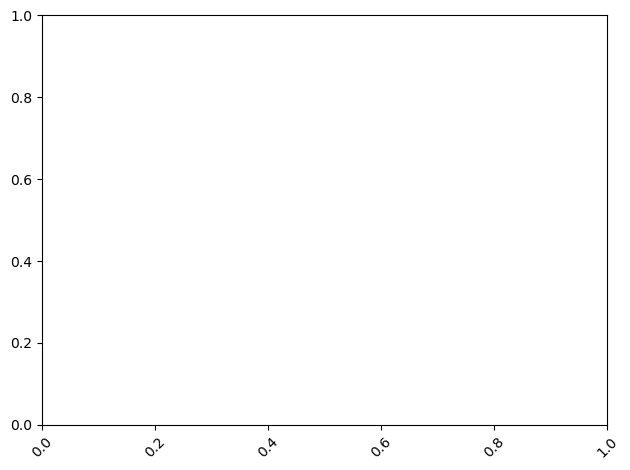

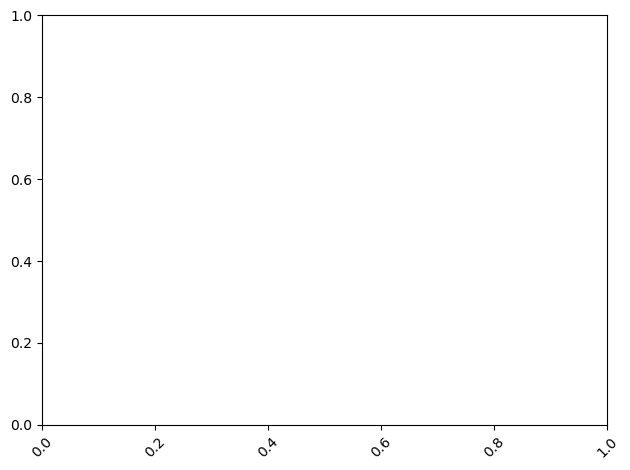

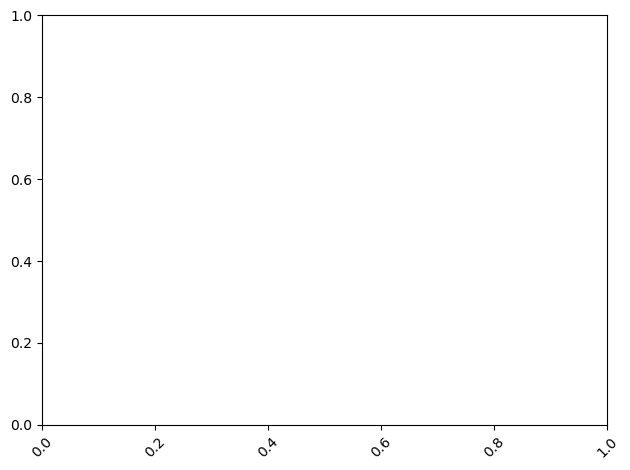

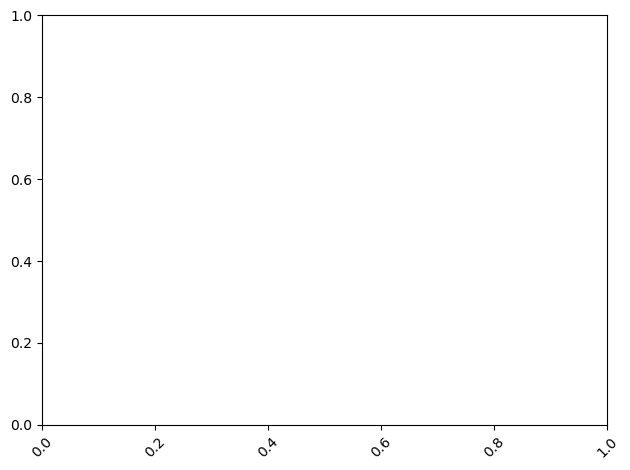

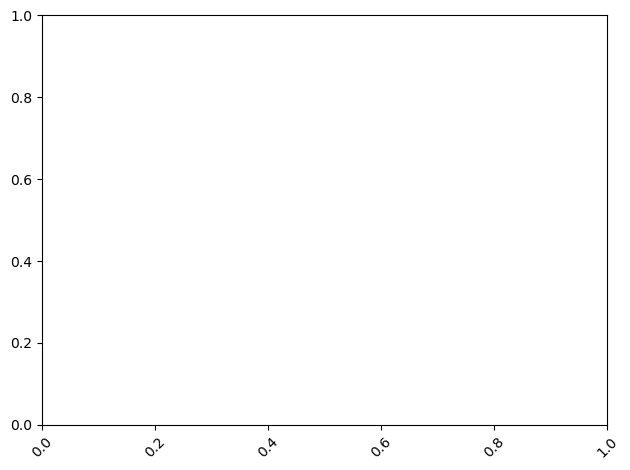

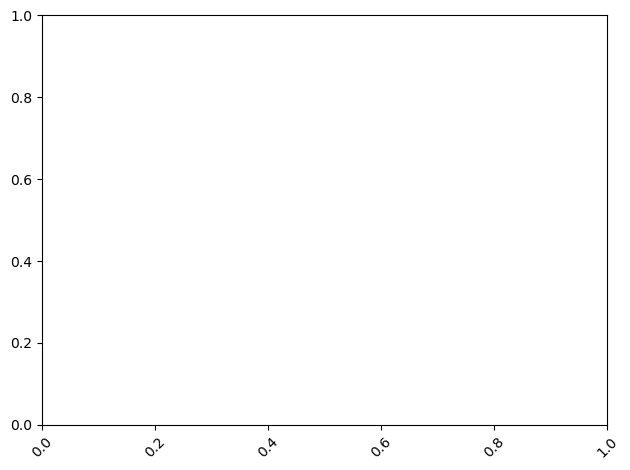

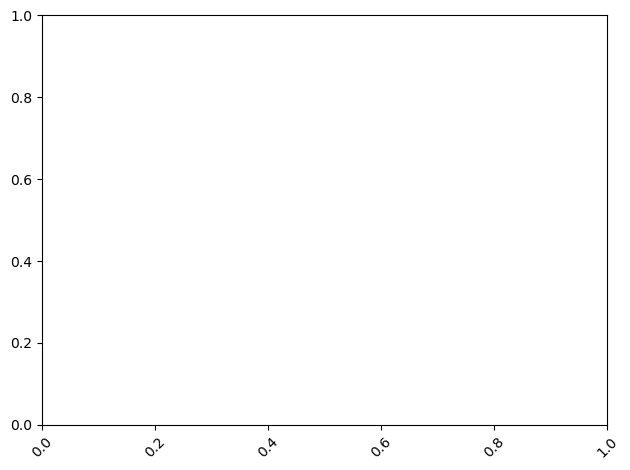

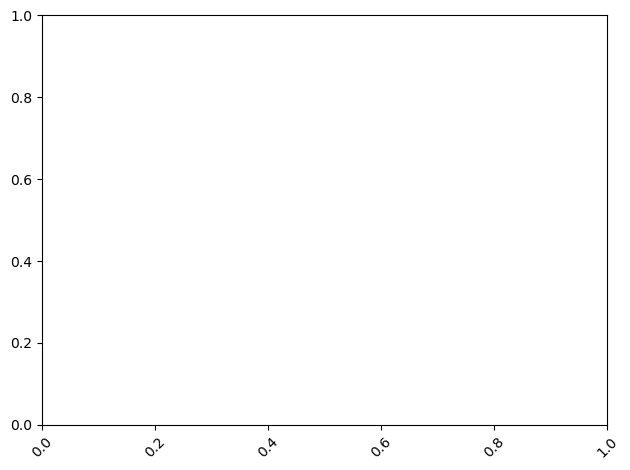

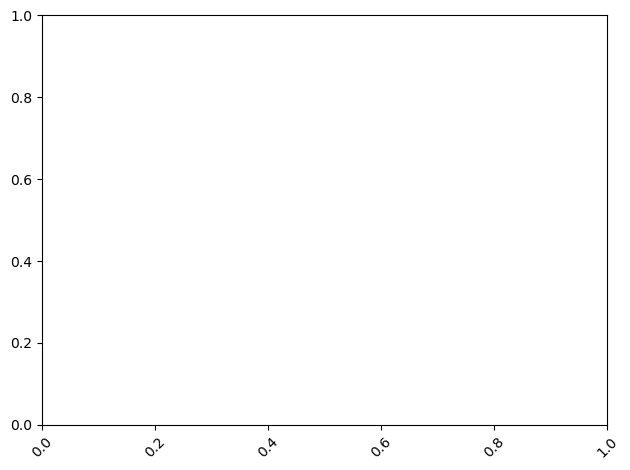

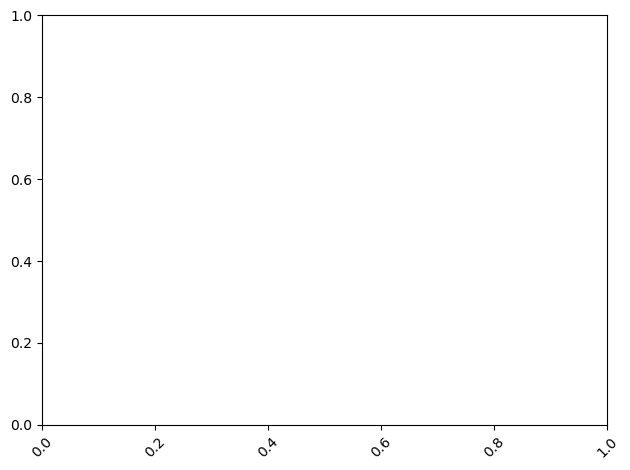

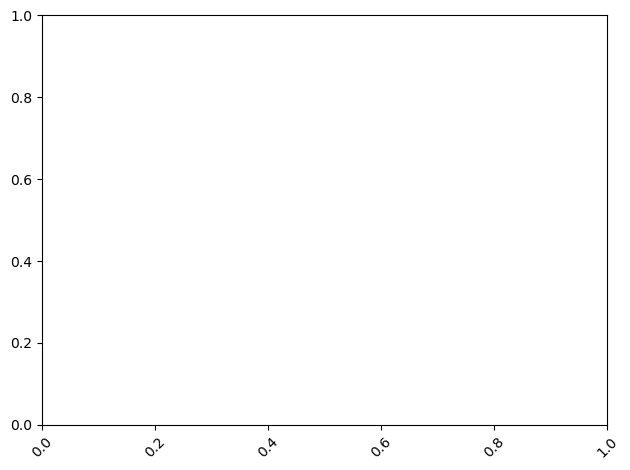

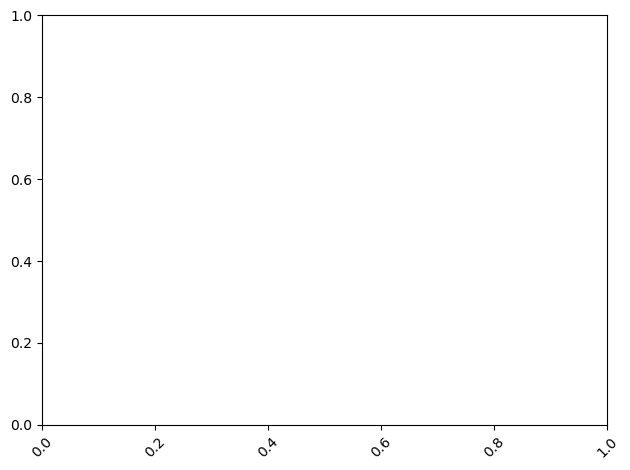

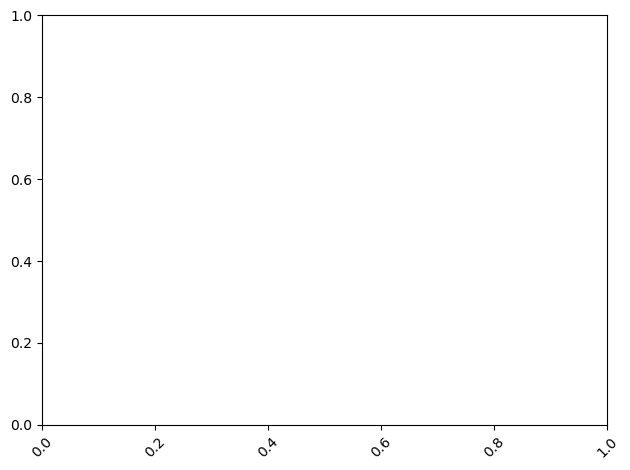

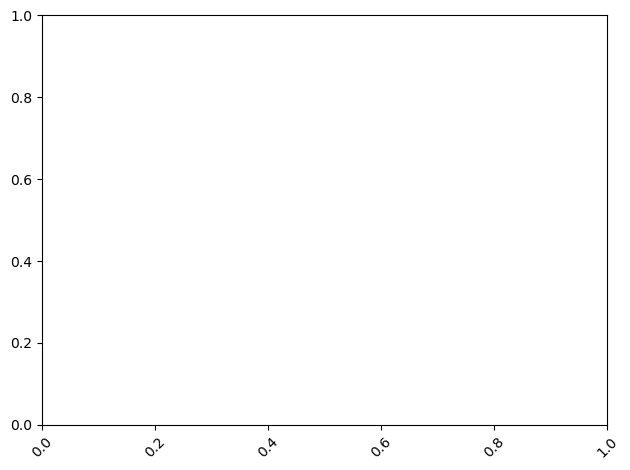

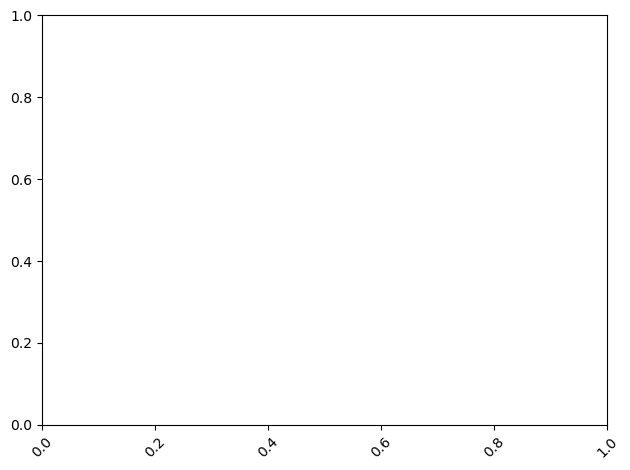

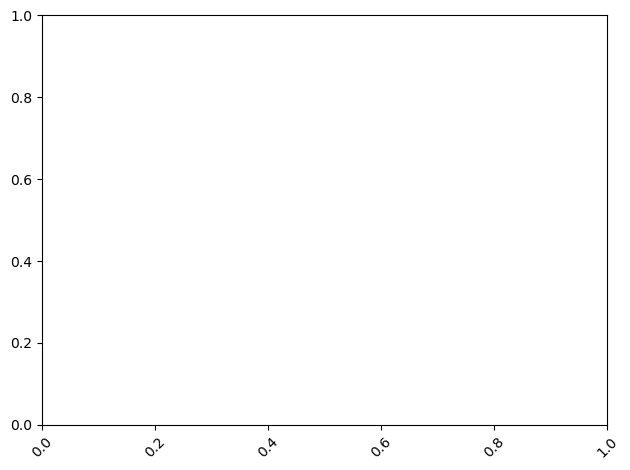

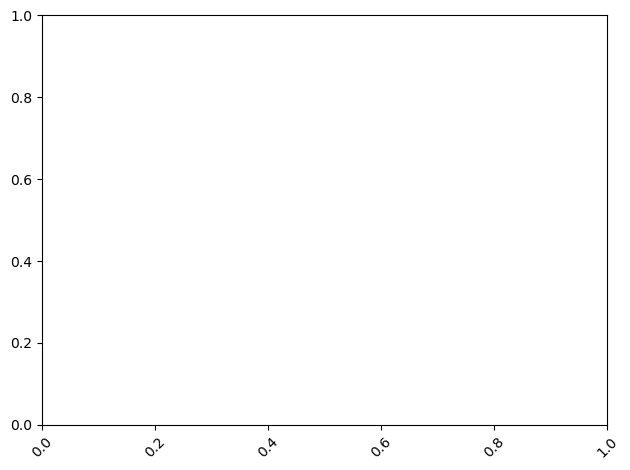

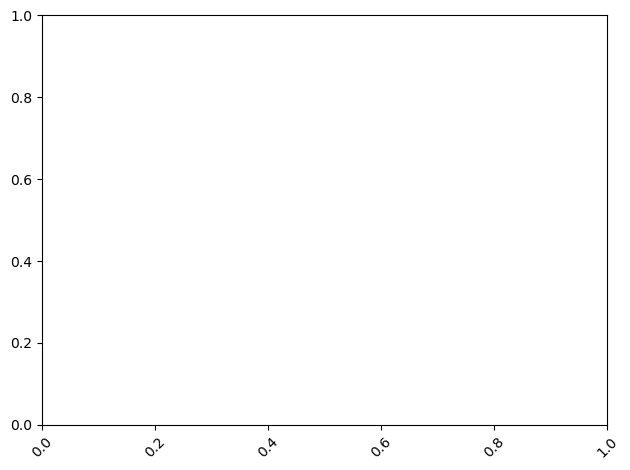

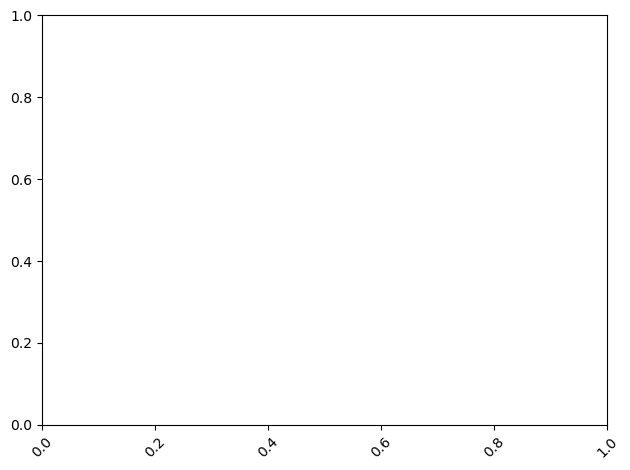

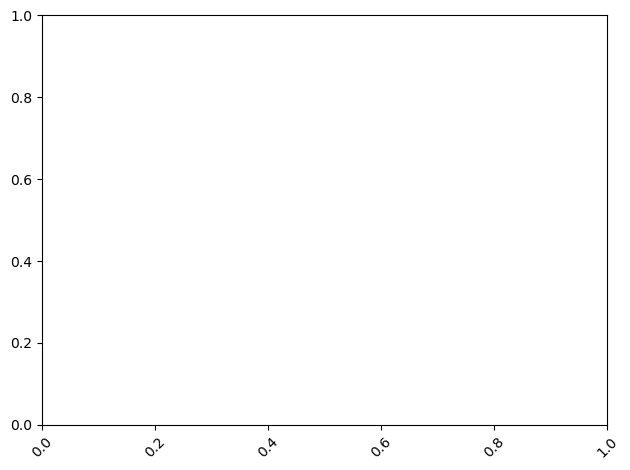

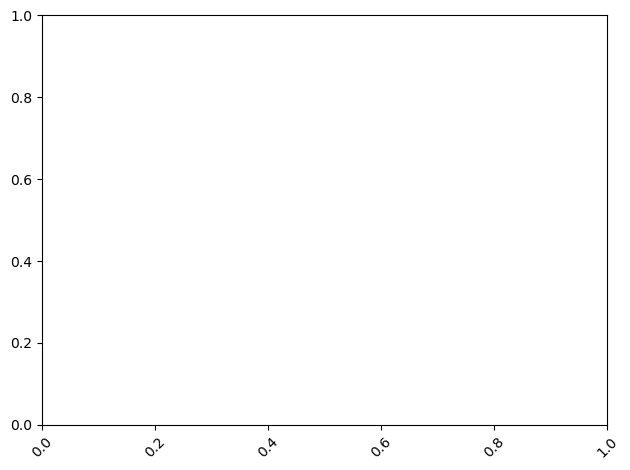

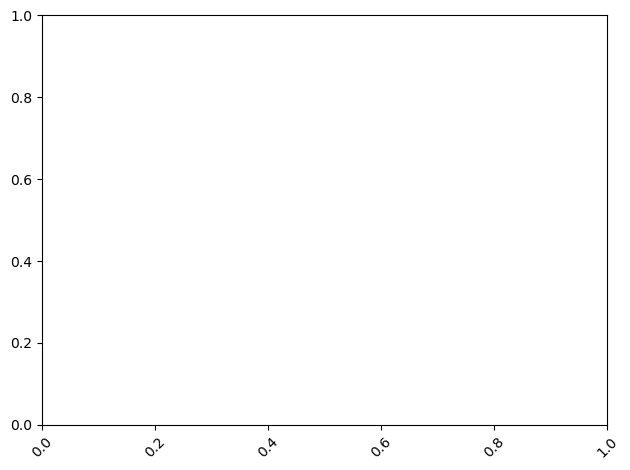

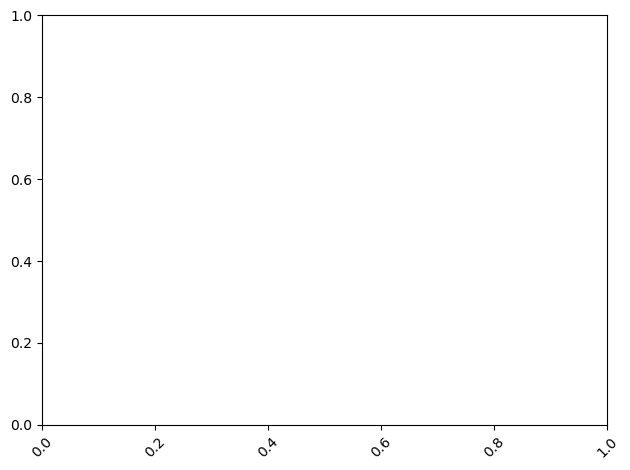

In [ ]:
import psutil
import time
import matplotlib.pyplot as plt

def display_disk_usage():
    # Lists to store the data for plotting
    timestamps = []
    used_space = []
    free_space = []

    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()
    
    while True:
        # Get disk usage statistics
        disk_usage = psutil.disk_usage('/')
        
        # Append data for plotting
        timestamps.append(time.strftime("%H:%M:%S"))
        used_space.append(disk_usage.used / (1024 ** 3))  # Convert to GB
        free_space.append(disk_usage.free / (1024 ** 3))  # Convert to GB
        
        # Clear the plot
        ax.clear()
        
        # Plot the data
        ax.plot(timestamps, used_space, label='Used Space (GB)', color='red')
        ax.plot(timestamps, free_space, label='Free Space (GB)', color='green')
        
        # Formatting the plot
        ax.set_xlabel('Time')
        ax.set_ylabel('Disk Space (GB)')
        ax.set_title('Real-Time Disk Usage')
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Show the plot
        plt.pause(1)  # Pause to allow the plot to update

if __name__ == "__main__":
    display_disk_usage()
